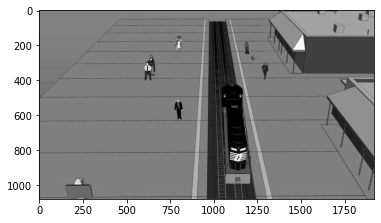

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# Define 
DATADIR = 'Static Frames'
CATEGORIES = ['No Danger', 'Danger']
IMG_SIZE = 180

# Read first image in NO Danger
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break


In [3]:
# print dimensions of above image
print(img_array.shape)

(1080, 1920)


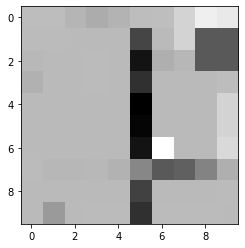

In [4]:
IMG_SIZE = 10

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

# Reset image size
IMG_SIZE = 180

In [5]:
training_data = []

# Prep img data and attach label to each
def create_training_data():

    for category in CATEGORIES:

        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            # make image grayscale
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            # resize image
            resized_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            # add image data with label
            training_data.append([resized_img_array, class_num])

create_training_data()

In [6]:
# print number of training examples
print(len(training_data))

508


In [11]:
# reduce continuity bias by shuffling data
import random
random.shuffle(training_data)

# print first 10 labels - should be shuffle
for sample in training_data[:11]:
    print(sample[1])

1
1
0
0
1
0
0
1
1
0
1


In [12]:
# Split image and label into separate lists
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [13]:
import pickle

# Save training example imgs as a streamable source of data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Save training examples labels as a streamable source of data
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
# check pickle was created
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [15]:
# dimensions of data: 256 pixel vals for (x, y) and 1 value for binary classification
print(X.shape[1:])

(180, 180, 1)
